In [139]:
!pip install scienceplots

  Using cached SciencePlots-2.1.1-py3-none-any.whl.metadata (11 kB)
Using cached SciencePlots-2.1.1-py3-none-any.whl (16 kB)


In [140]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

In [141]:
# def constans
m = 1.0
m2 = 2.0 * m 
V = 1.0
R = 1.0

m_rel = (m * m2) / (m + m2) 

In [142]:
def U(r): 
    r = np.abs(r)
    return np.where(r > R, 0, -V)

def Ueff(r):
    r = np.abs(r)
    r = np.where(r == 0.0, np.inf, r)
    return U(r) + l**2 / (2 * m_rel * r**2)

def compute_rho_bound(E, l, mu, V, R):
    E_out = l**2 / (2.0 * mu * (R**2))
    if not (E_out - V <= E < E_out):
        return None, None

    rho1 = np.sqrt(l**2 / (2.0 * mu * (E + V)))
    return rho1, R

def dphi_dr(r, l, mu, E):
    U_eff = Ueff(r)
    denom = (2.0/mu) * (E - U_eff)

    denom = np.where(denom <= 0, np.nan, denom)
    integrand = (l / (mu * r**2)) / np.sqrt(denom)
    return np.nan_to_num(integrand, nan=0.0)


## Plot Potential $U_{eff}(\rho)$

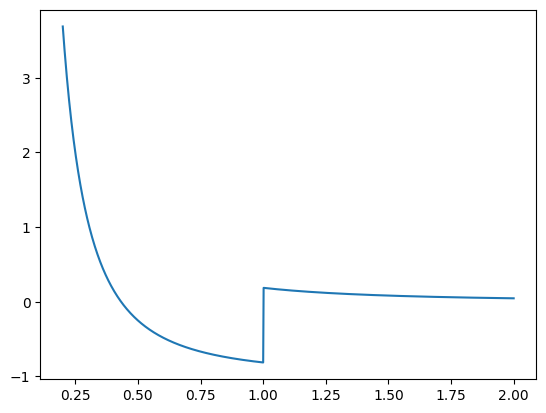

In [29]:
rho = np.linspace(0.2, 2*R, 1000)
U_eff = U(rho) + (l**2 / (2*m_rel*rho**2))
plt.plot(rho, U_eff)

## Solve Question 6

In [143]:
rho1, rho2 = compute_rho_bound(E, l, m_rel, V, R)

phi, err = quad(dphi_dr, rho1, rho2, args=(l,m_rel, E,))
delta_phi = 2*phi
delta_phi

2.0882842159013015

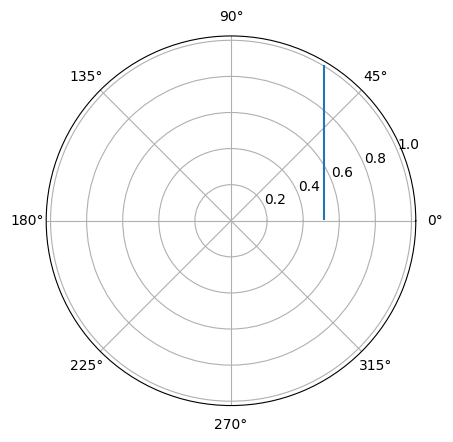

In [19]:
def phi(r):
    phi, err = quad(dphi_dr, rho1, r, args=(l,m_rel, E,))
    return phi

r = np.linspace(rho1 + 1e-4, rho2, 500)
phi_vals = np.array([phi(ri) for ri in r])

# quad is very slow
plt.polar(phi_vals, r)       # use polar plot to show trajectory
plt.show()

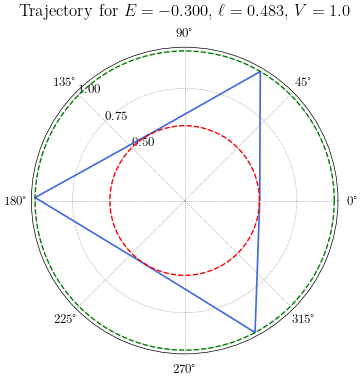

In [153]:
E = -0.3
l = 0.4856
lc = R* np.sqrt(2 * m_rel*(E + V)) * np.cos(np.pi/3)

rho1, rho2 = compute_rho_bound(E, lc, m_rel, V, R)
r = np.linspace(rho1 * 1.0001, rho2 * 0.9999, 20000)  # feines Grid
integrand = dphi_dr(r, lc, m_rel, E)

phi_vals = np.cumsum((integrand[:-1] + integrand[1:]) / 2 * np.diff(r))
phi_vals = np.insert(phi_vals, 0, 0.0)  # start at phi=0

phi_max = phi_vals[-1]   # phi at rho2

def fr_full(n_periods: int):

    r_full_list = []
    phi_full_list = []
    for k in range(n_periods):

        phi_forward = phi_vals + k * 2.0 * phi_max
        phi_return = 2.0 * (k + 1) * phi_max - phi_vals[::-1]
        r_full_list.append(r)
        r_full_list.append(r[::-1])
        phi_full_list.append(phi_forward)
        phi_full_list.append(phi_return)
        
    r_full = np.concatenate(r_full_list)
    phi_full = np.concatenate(phi_full_list)
    
    return r_full, phi_full

r_full, phi_full = fr_full(3)

fig = plt.figure(figsize=(7,4))
ax = plt.subplot(projection='polar')

# --- main trajectory ---
ax.plot(phi_full, r_full, color='royalblue', lw=1.2, label='Particle trajectory')

# --- radial boundaries (ρ₁ and ρ₂) ---
phi_circle = np.linspace(0, 2*np.pi, 1000)
ax.plot(phi_circle, np.full_like(phi_circle, rho1), 'r--', lw=1, label=r'Inner turning point $\rho_1$')
ax.plot(phi_circle, np.full_like(phi_circle, rho2), 'g--', lw=1, label=r'Outer boundary $R$')

# --- styling ---
ax.set_title(fr"Trajectory for $E={E:.3f}$, $\ell={lc:.3f}$, $V={V}$", va='bottom')
# ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
ax.set_rlabel_position(135)
ax.set_rticks([rho1, (rho1+rho2)/2, rho2])
ax.tick_params(labelsize=9)

plt.tight_layout()

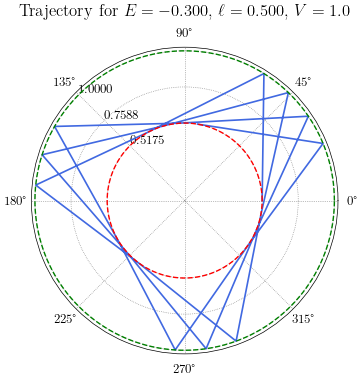

In [155]:
E = -0.3
l = 0.5

rho1, rho2 = compute_rho_bound(E, l, m_rel, V, R)
r = np.linspace(rho1 * 1.0001, rho2 * 0.9999, 20000)  # feines Grid
integrand = dphi_dr(r, l, m_rel, E)

phi_vals = np.cumsum((integrand[:-1] + integrand[1:]) / 2 * np.diff(r))
phi_vals = np.insert(phi_vals, 0, 0.0)  # start at phi=0

phi_max = phi_vals[-1]   # phi at rho2

def fr_full(n_periods: int):

    r_full_list = []
    phi_full_list = []
    for k in range(n_periods):

        phi_forward = phi_vals + k * 2.0 * phi_max
        phi_return = 2.0 * (k + 1) * phi_max - phi_vals[::-1]
        r_full_list.append(r)
        r_full_list.append(r[::-1])
        phi_full_list.append(phi_forward)
        phi_full_list.append(phi_return)
        
    r_full = np.concatenate(r_full_list)
    phi_full = np.concatenate(phi_full_list)
    
    return r_full, phi_full

r_full, phi_full = fr_full(10)

fig = plt.figure(figsize=(7,4))
ax = plt.subplot(projection='polar')

# --- main trajectory ---
ax.plot(phi_full, r_full, color='royalblue', lw=1.2, label='Particle trajectory')

# --- radial boundaries (ρ₁ and ρ₂) ---
phi_circle = np.linspace(0, 2*np.pi, 1000)
ax.plot(phi_circle, np.full_like(phi_circle, rho1), 'r--', lw=1, label=r'Inner turning point $\rho_1$')
ax.plot(phi_circle, np.full_like(phi_circle, rho2), 'g--', lw=1, label=r'Outer boundary $R$')

# --- styling ---
ax.set_title(fr"Trajectory for $E={E:.3f}$, $\ell={l:.3f}$, $V={V}$", va='bottom')
# ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
ax.set_rlabel_position(135)
ax.set_rticks([rho1, (rho1+rho2)/2, rho2])
ax.tick_params(labelsize=9)

plt.tight_layout()